# GeoChronR

## 1 Introducción a GeoChronR

#### Esta es la viñeta introductoria que muestra la funcionalidad de geoChronR para resolver problemas reales con datos de edad incierta. Aquí hay una tabla de contenidos de las otras guías incluidas aquí:

#### Casi siempre, su flujo de trabajo geoChronR comenzará con la carga de un archivo LiPD válido. Entonces querrás las bibliotecas geoChronR y lipdR.

In [1]:
library(geoChronR)
library(magrittr)
library(ggplot2)

Welcome to geoChronR version 1.1.15! 


### 1.2 Cargando tus datos

#### En este caso, cargaremos el conjunto de datos de Wang 2001 Hulu Cave que vino con el paquete. Si tiene el paquete lipdR, puede cargar un archivo LiPD directamente desde su computadora, usar L - readLipd() para seleccionar interactivamente un archivo (o un directorio), o ingresar la ruta al archivo o al directorio que desee: L - readLipd('~/Descargas/mi.lpd')

In [2]:
hulu <- lipdR::readLipd("http://lipdverse.org/geoChronR-examples/Hulucave.Wang.2001.lpd")

[1] "Loading 1 datasets from /tmp/RtmpFzWu1a/Hulucave.Wang.2001.lpd..."
[1] "reading: Hulucave.Wang.2001.lpd"


## 2. Crear un modelo de edad y almacenar y visualizar sus conjuntos.

In [3]:
hulu <- runBchron(hulu,
                  cal.curves = "normal",
                  iter = 10000,
                  extractDate = 10000,
                  meas.table.num = 2,
                  lab.id.var = NULL,
                  age.var = 'age',
                  age.uncertainty.var = 'ageUncertaintyHigh',
                  age.14c.var = NULL,
                  age.14c.uncertainty.var =  NULL,
                  depth.var = 'depth',
                  reservoir.age.14c.var = NULL,
                  reservoir.age.14c.uncertainty.var = NULL,
                  rejected.ages.var = NULL)

#correct units and rename
hulu$chronData[[1]]$model[[1]]$ensembleTable[[1]]$depth$units <- "mm"
hulu$chronData[[1]]$model[[1]]$ensembleTable[[1]]$depth$variableName <- "position"

Looking for laboratory ID 
laboratory ID does not seem to exist, moving on.
Looking for radiocarbon ages 
radiocarbon ages does not seem to exist, moving on.
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
1-sigma radiocarbon age uncertainty (+/-) does not seem to exist, moving on.
Looking for calibrated/calendar ages 
[1] "Found it! Moving on..."
Looking for 2-sigma calibrated age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected ages does not seem to exist, moving on.
[1] "Variable choices for reuse..."
For future reference: here are the options you chose:
 Find later with getLastVarString()
la

### 2.1 Plotting the chronology

[1] "Found it! Moving on..."
[1] "Found it! Moving on..."
[1] "plotting your chron ensemble. This make take a few seconds..."


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


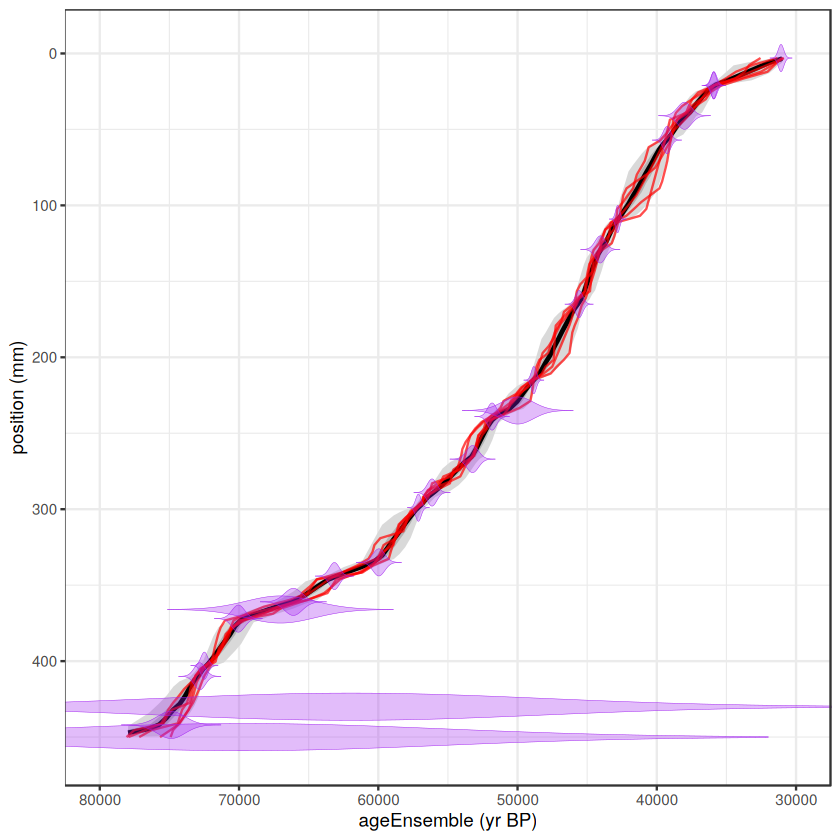

In [4]:
chronPlot <- plotChronEns(hulu,truncate.dist = 1e-6)+ggtitle(NULL)+coord_cartesian(xlim = c(80000,30000))
print(chronPlot)

#### plotChron() es un contenedor para múltiples funciones de trazado y tiene muchas opciones, que probablemente requieran retoques para producir un buen argumento. Vea todas las opciones ejecutando ?plotChron

### 2.2 Mapeo del conjunto de edades a las mediciones de paleoData

In [5]:
hulu <- mapAgeEnsembleToPaleoData(hulu,age.var = "ageEnsemble",paleo.meas.table.num = 2)

[1] "Hulucave.Wang.2001"
[1] "Looking for age ensemble...."
[1] "Found it! Moving on..."
[1] "Found it! Moving on..."
[1] "getting depth from the paleodata table..."
[1] "Found it! Moving on..."
mapAgeEnsembleToPaleoData created new variable ageEnsemble in paleo 1 measurement table 2
mapAgeEnsembleToPaleoData also created new variable ageMedian in paleo 1 measurement table 2


La cronología del conjunto en un chronModel puede tener o no valores correspondientes a las mediciones paleoclimáticas o paleoambientales en paleoData. Para asignar los valores del conjunto del modelo a una tabla de medidas en paleoData, utilice

### Selecting the variables of interest

Echemos un vistazo a esta serie temporal.

Primero, sacaremos el conjunto de edades y los datos d18O para referencia futura. La función selectData() lo hace fácil.

In [6]:
hulu.ae <- selectData(hulu,var.name = "ageEnsemble",meas.table.num = 2)

[1] "Found it! Moving on..."


In [7]:
hulu.d18O <- selectData(hulu,var.name = "d18O",meas.table.num = 2)

[1] "Found it! Moving on..."


### 2.3 Crear un diagrama de serie temporal como un diagrama de espagueti de líneas

Este podría ser un buen momento para echar un vistazo a los datos, tracemos el conjunto de líneas para estos

Aquí simplemente trazaremos 50 datos con 50 de los ensemble members.

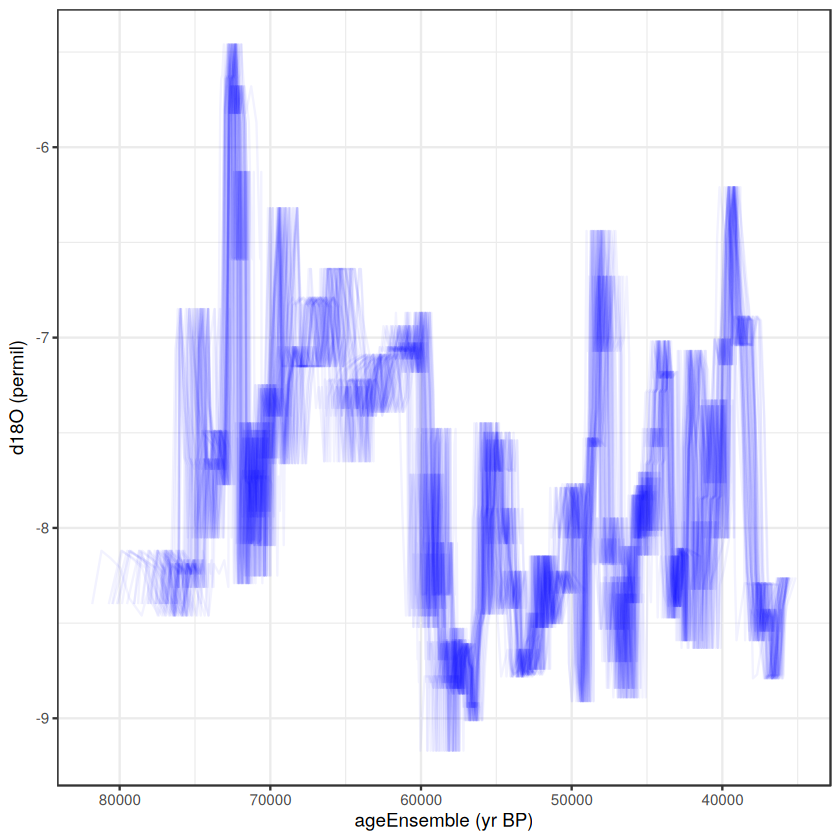

In [8]:
hulu.ts.plot <-  plotTimeseriesEnsLines(X = hulu.ae,Y = hulu.d18O,alp = 0.05,n.ens.plot = 50,color = "blue")
print(hulu.ts.plot)

### Crear un gráfico de serie temporal con intervalos de confianza de cinta  

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


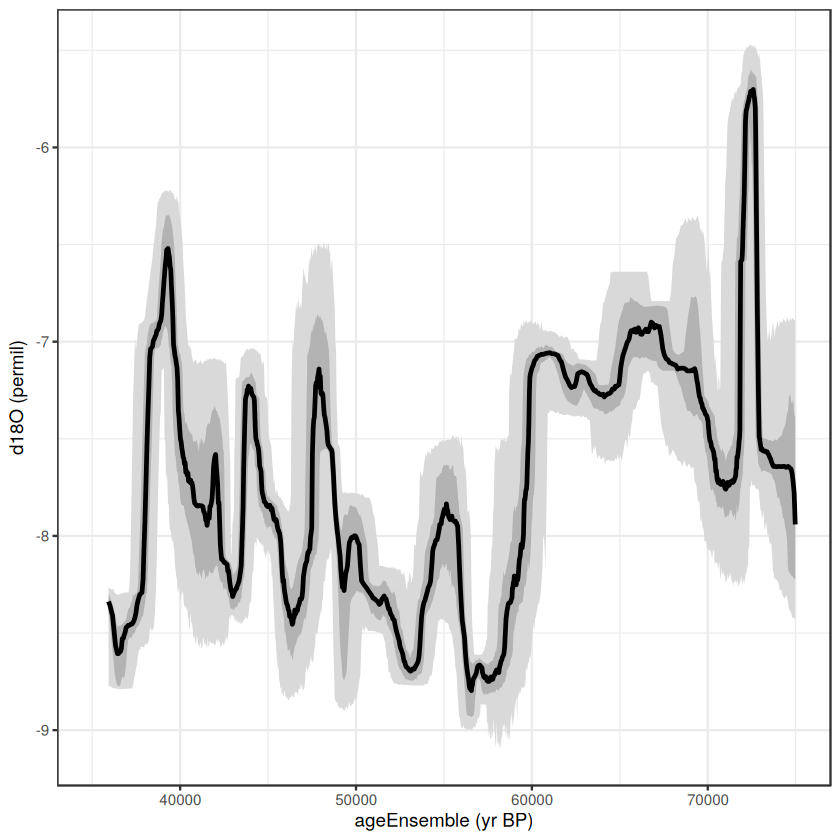

In [9]:
hulu.ts.plot <- plotTimeseriesEnsRibbons(X = hulu.ae,Y = hulu.d18O,n.bins = 1000)+xlim(c(35000,75000))
print(hulu.ts.plot)

### Combinando los dos tipos de gráficos de series temporales

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


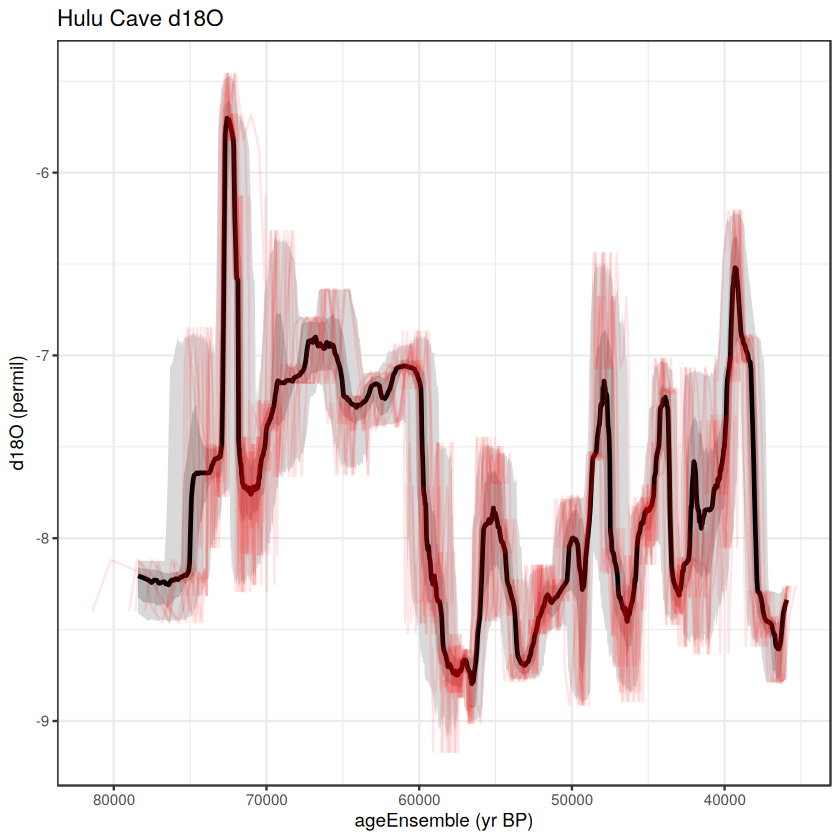

In [10]:
hulu.ts.plot <- plotTimeseriesEnsLines(X = hulu.ae,Y = hulu.d18O,alp = 0.1,n.ens.plot = 10,color = "red",add.to.plot = hulu.ts.plot)+ggtitle("Hulu Cave d18O")
print(hulu.ts.plot)

### Cargar en otro conjunto de datos

### Comparemos estos datos con el núcleo de hielo GISP2.

In [13]:
  gisp2 <- lipdR::readLipd("http://lipdverse.org/geoChronR-examples/GISP2.Alley.2000.lpd")

[1] "Loading 1 datasets from /tmp/RtmpFzWu1a/GISP2.Alley.2000.lpd..."
[1] "reading: GISP2.Alley.2000.lpd"


Utilice BAM (modelo de edad con bandas) para crear un conjunto de edades

Se trata de un núcleo de hielo, por lo que la cronología no se basa en puntos de enlace radiométricos. Usemos BAM (modelo de edad con bandas) para estimar una incertidumbre de conteo del 2% sobre esto. Aquí especificamos todos los parámetros para que se ejecute en modo no interactivo.

In [14]:
gisp2 = runBam(gisp2,
               paleo.num = 1, 
               paleo.meas.table.num = 1,
               chron.num = 1,
               model.num = 1,
               ens.table.number = 1, 
               make.new = T,
               n.ens = 1000,
               model = list(name = "poisson",
                            param = 0.02, 
                            resize = 0, 
                            ns = 1000)
               )

[1] "Found it! Moving on..."


### Select the relevant variables

In [15]:
gisp2.d18O <- selectData(gisp2,var.name = "temp")

[1] "Found it! Moving on..."


In [16]:
gisp2.ens <- selectData(gisp2,var.name = "yearEnsemble")

[1] "Found it! Moving on..."


In [17]:
gisp2.ens$units

[1] "AD"

In [18]:
gisp2.ens <- convertAD2BP(gisp2.ens)

## Plot the timeseries

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


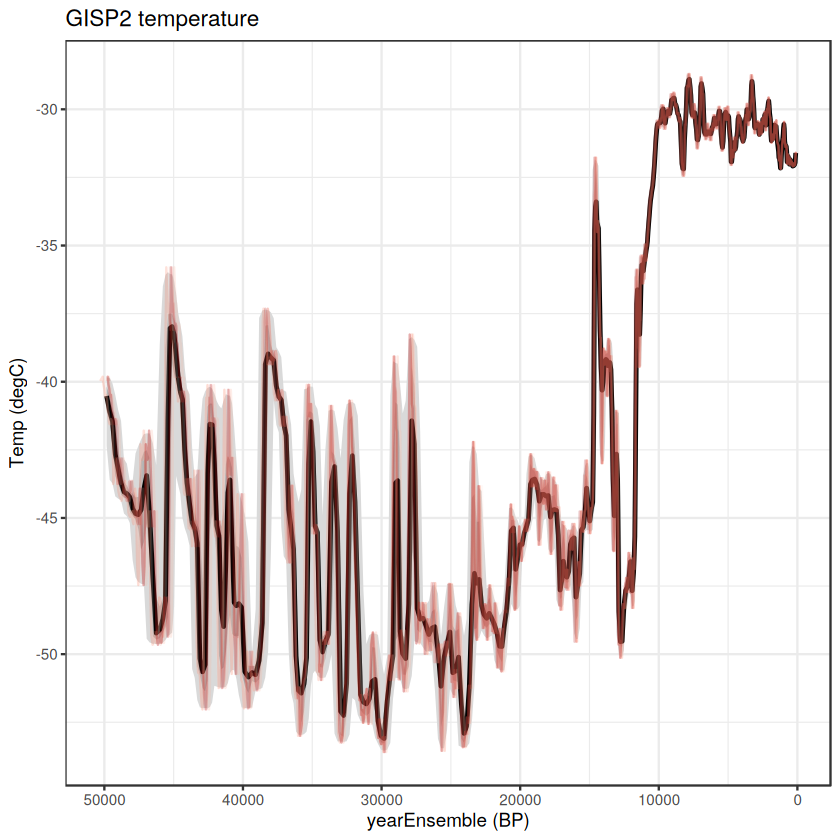

In [19]:
gisp2.ts.plot <- plotTimeseriesEnsRibbons(X = gisp2.ens,Y = gisp2.d18O,n.bins = 500) %>% 
  plotTimeseriesEnsLines(X = gisp2.ens,Y = gisp2.d18O,n.ens.plot = 5,color = "Reds",alp = .2)+
  ggtitle("GISP2 temperature")

print(gisp2.ts.plot)

# Compare the two timeseries

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


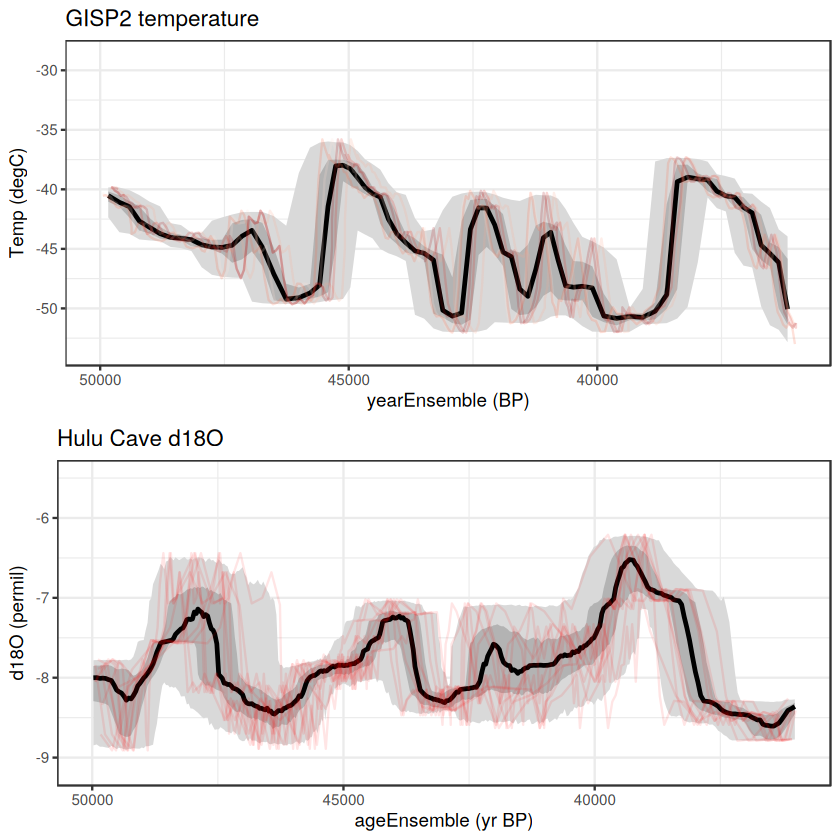

In [20]:
library(gridExtra)
overlap <- c(36000,50000)
grid.arrange(grobs = list(gisp2.ts.plot+xlim(rev(overlap)),hulu.ts.plot+xlim(rev(overlap))),nrow = 2)

# 3. Correlación edad-incierta

In [21]:
library(geoChronR)
library(ggplot2)
library(gridExtra)

In [22]:
loadRemote("https://lipdverse.org/geoChronR-examples/introductionOutput.RData",useSavedNames = TRUE)

#### Echemos otro vistazo a las dos series temporales durante el período de superposición. Para calcular la correlación incierta de la edad, usemos la función corEns de geoChronR. Tenga en cuenta que este enfoque es, en muchos sentidos, simplista. La correlación de los dos conjuntos de datos de edad incierta caracterizará la relación, pero ignora la evidencia auxiliar que puede respaldar una relación mecanicista entre dos series temporales. Aún así, ilustra cómo la incertidumbre sobre la edad puede afectar la alineación aparente entre dos conjuntos de datos, que es el propósito de este ejemplo.

In [23]:
corout <- corEns(time.1 = gisp2.ens,
                 values.1 = gisp2.d18O,
                 time.2 = hulu.ae,
                 values.2 = hulu.d18O,
                 bin.step = 200,
                 max.ens = 1000,
                 isopersistent  = TRUE,
                 isospectral = TRUE,
                 gaussianize = TRUE)

[1] "binning from 33981 to 50988 ..."
  |                                                                      |   0%[1] "Calculating 1000 correlations"
  |======================================================================| 100%


In [24]:
corout$cor.stats

percentiles,r,pSerial,pRaw,pIsopersistent,pIsospectral
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.025,-0.33763626,0.1940403,0.006664185,0.007647773,0.09539092
0.250,-0.17594853,0.4826902,0.146834686,0.152742714,0.38739947
0.500,-0.05835175,0.6755336,0.394924472,0.431115771,0.63531948
0.750,0.04443387,0.8374301,0.671717604,0.727530946,0.84189660
0.975,0.17044320,0.9852340,0.970915528,0.980823550,0.98853369


## Graficamos los resultados 

#### Esto nos da una idea de primer orden de los resultados, pero usemos la función plotCorEns para profundizar más.

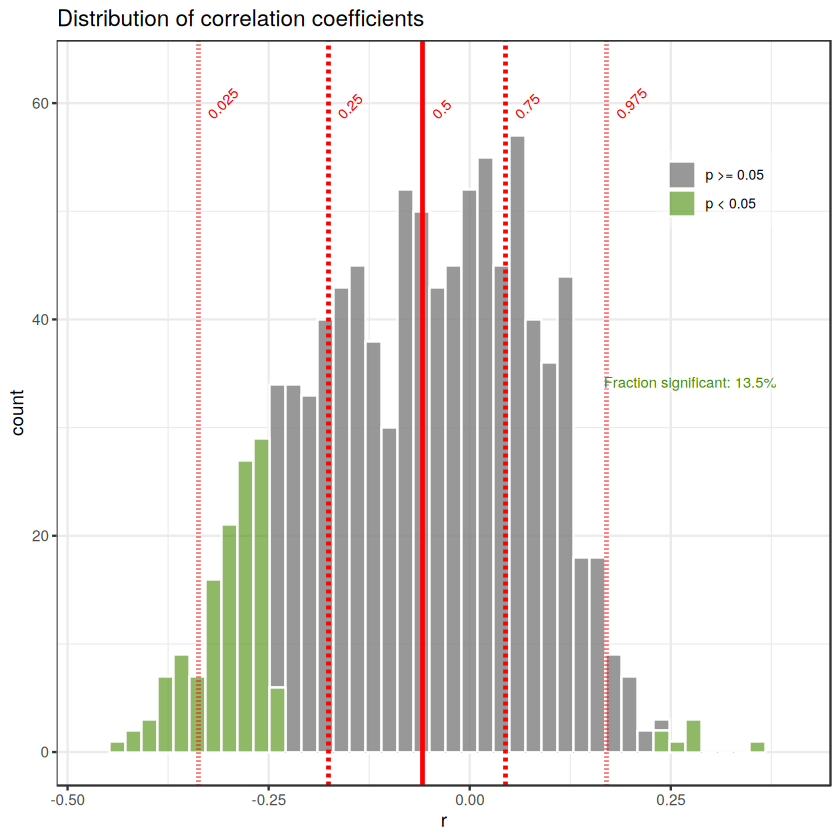

In [25]:
plotCorEns(corout,
           legend.position =c(.85,.8),
           f.sig.lab.position = c(.85,.6),
           significance.option = "raw",
           use.fdr = FALSE)+ggtitle("Distribution of correlation coefficients")

##### Bien, aquí vemos la distribución de los coeficientes de correlación y su importancia. Tenga en cuenta que elegimos 'significance.option = 'raw'', por lo que en verde vemos la distribución de correlaciones significativas determinadas por una prueba T estándar, sin ninguna consideración de autocorrelación. En este caso observamos que el 13,5% de las correlaciones son significativas. Por supuesto, sabemos que este es un enfoque muy simplista y que con muchos conjuntos de datos paleoclimáticos debemos considerar el impacto de la autocorrelación temporal, que fácilmente puede causar correlaciones espurias. geoChronR aborda este punto utilizando tres enfoques, que se detallan en el manuscrito de geoChronR y se resumen aquí:

#### El enfoque más simple (“eff-n”) es ajustar el tamaño de la muestra de la prueba para reflejar la reducción en los grados de libertad debido a la autocorrelación.

##### Alternativamente, la opción “isopersistente” generará sustitutos, o series temporales sintéticas aleatorias, que emulen las características de persistencia de la serie y las utilicen para estimar la importancia.

#### La última opción, 'isoespectral', también genera sustitutos para estimar la importancia, pero lo hace codificando las fases espectrales de los dos conjuntos de datos, preservando así su espectro de potencia y destruyendo la señal correlacionada.

#### Echemos un vistazo a cada una de estas tres opciones,

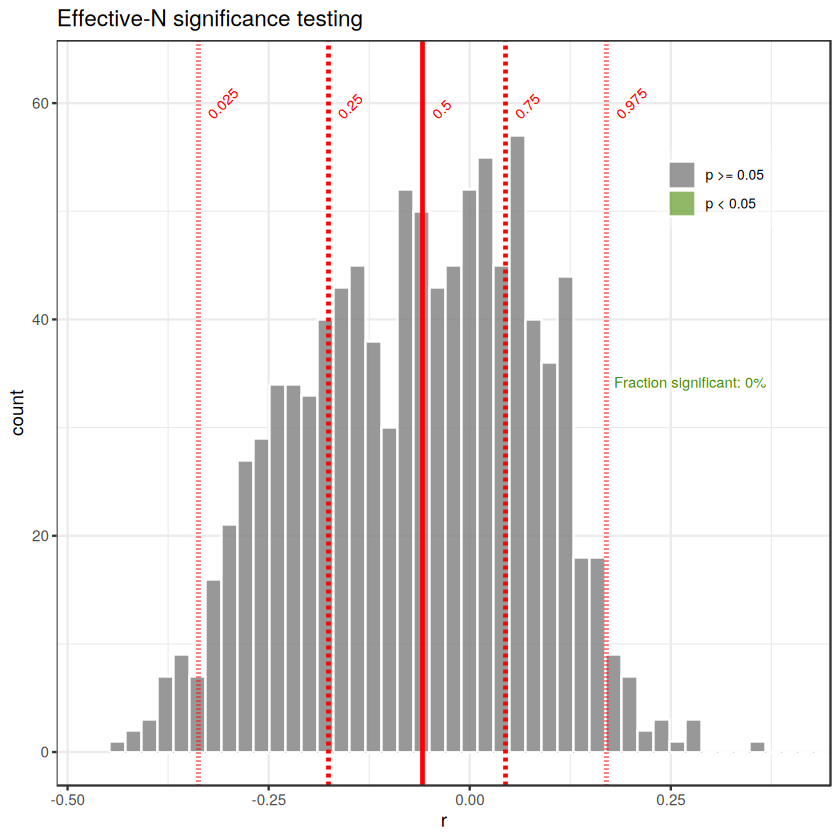

In [26]:
plotCorEns(corout,
           legend.position =c(.85,.8),
           f.sig.lab.position = c(.85,.6),
           significance.option = "eff-n",
           use.fdr = FALSE)+ggtitle("Effective-N significance testing")

Aquí vemos un efecto dramático al tener en cuenta la autocorrelación serial en nuestras pruebas de significancia. El uso del método “N efectivo” reduce el porcentaje de correlaciones significativas (en el nivel de 0,05) a 0. Sin embargo, cuando la autocorrelación es grande, este enfoque reduce drásticamente los grados de libertad efectivos y se ha demostrado que es demasiado conservador en muchos casos. Así que echemos un vistazo a los enfoques basados ​​en sustitutos.

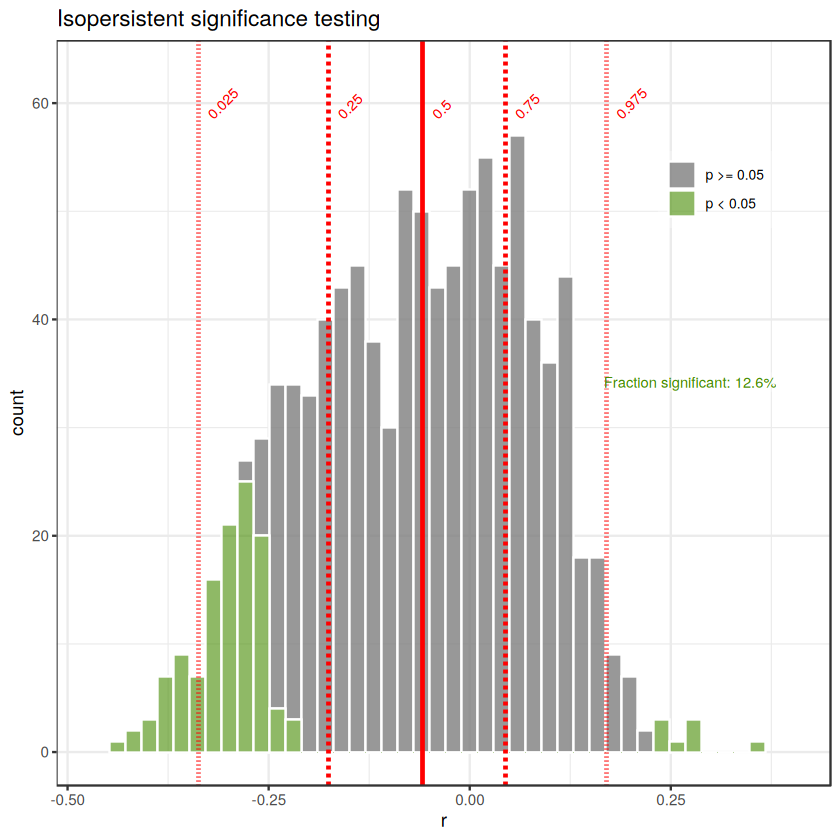

In [27]:
plotCorEns(corout,
           legend.position =c(.85,.8),
           f.sig.lab.position = c(.85,.6),
           significance.option = "isopersistent",
           use.fdr = FALSE)+ggtitle("Isopersistent significance testing")

El uso del enfoque 'isopersistente', en el que simulamos miles de correlaciones sintéticas con las mismas características de autocorrelación que los datos reales, y vemos con qué frecuencia observamos valores r en los niveles observados, da un resultado mucho menos conservador. En este caso, la fracción de correlaciones significativas es sólo ligeramente menor que cuando no se tiene en cuenta la autocorrelación en absoluto.

Este es un buen punto para señalar que tenemos otro problema estadístico entre manos. Además del impacto de la autocorrelación en este análisis, repetir la prueba entre varios miembros del conjunto plantea la cuestión de la multiplicidad de la prueba [@Ventura2004], o el 'efecto de mirar a otra parte'. Con un nivel de significancia del 5%, uno esperaría que un conjunto de 1000 miembros contuviera 50 “descubrimientos” espurios – casos en los que se rechaza la hipótesis nula, aquí se rechaza “sin correlación”. Para superar este problema, controlamos esta tasa de descubrimiento falso (FDR) utilizando el enfoque simple de @BenjaminiHochberg95, codificado en R por @Ventura2004. FDR tiene en cuenta este efecto para minimizar el riesgo de identificar correlaciones tan espurias simplemente debido a pruebas repetidas. De hecho, filtra el conjunto de resultados 'significativos' identificados por cada prueba de hipótesis (N efectivo, isopersistente o isoespectral). Tracemos esto nuevamente, pero cambiemos la opción use.fdr a VERDADERO.

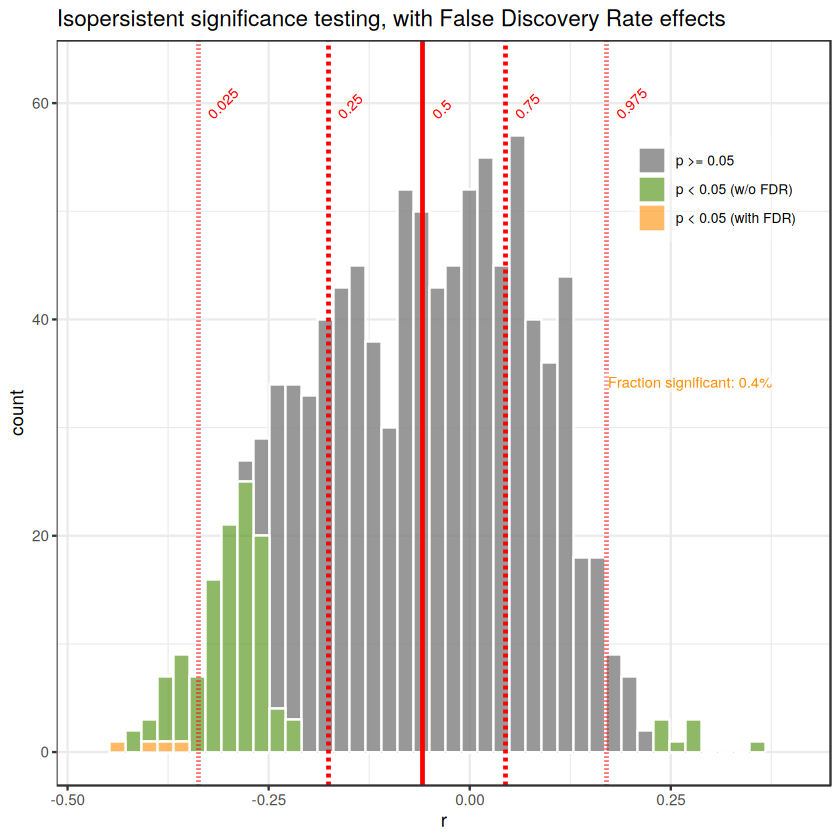

In [28]:
plotCorEns(corout,
           legend.position =c(.85,.8),
           f.sig.lab.position = c(.85,.6),
           significance.option = "isopersistent",
           use.fdr = TRUE)+ggtitle("Isopersistent significance testing, with False Discovery Rate effects")

Ahora vemos cómo tener en cuenta a FDR puede reducir aún más nuestros niveles de significancia. En este caso, se esperan todas las correlaciones significativas, excepto una pequeña fracción, debido a la multiplicidad de las pruebas: la aleatoriedad que estamos muestreando repitiendo la correlación entre 1000 miembros del conjunto. Después de contabilizar esto, sólo el 0% de los miembros del conjunto son significativos.

Tenga en cuenta que tener en cuenta la tasa de descubrimiento falso es un proceso independiente de la obtención de valores p y se puede aplicar a cualquiera de las opciones de significado en geoChronR. Para nuestro ejemplo final, veremos las pruebas de significación isoespectral y tendremos en cuenta FDR.